In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("diabetes.csv")

In [3]:
features =  ['Pregnancies', 'PlasmaGlucose', 'DiastolicBloodPressure',
       'TricepsThickness', 'SerumInsulin', 'BMI', 'DiabetesPedigree', 'Age']

In [4]:
X = df[features].values
y = df['Diabetic'].values

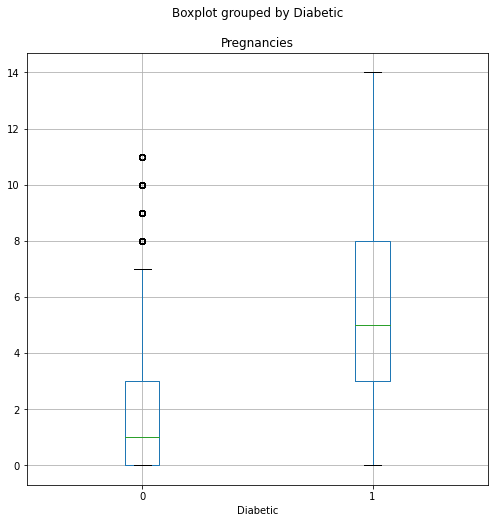

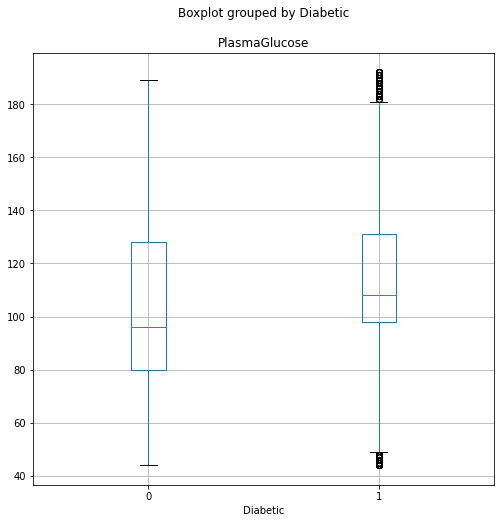

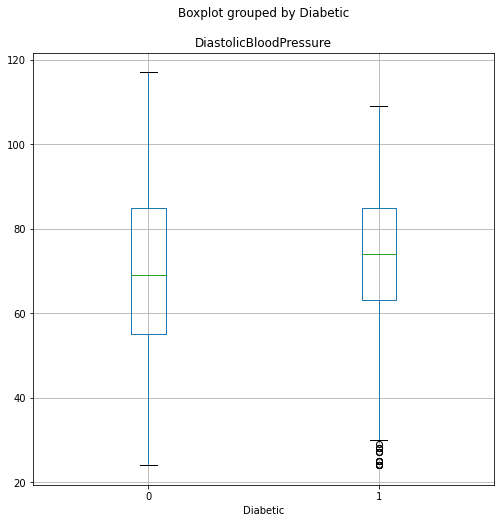

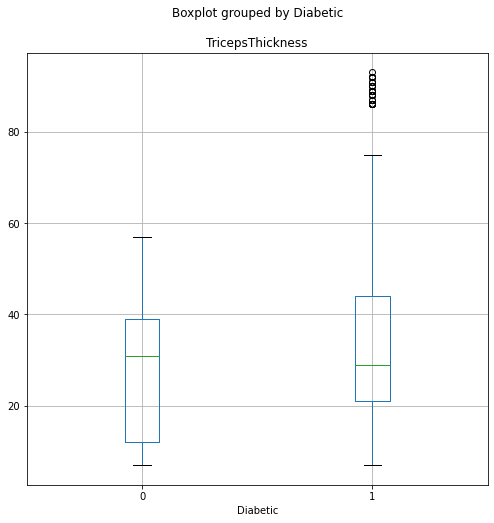

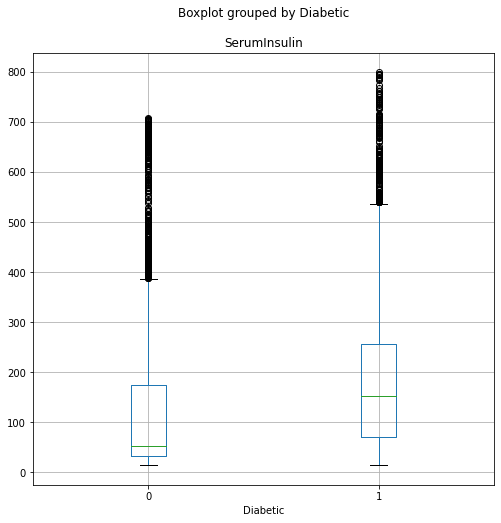

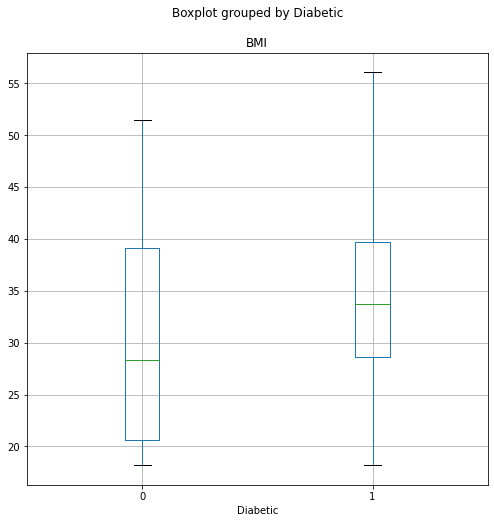

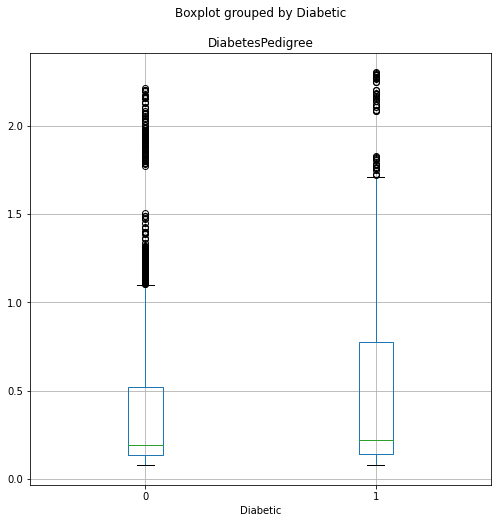

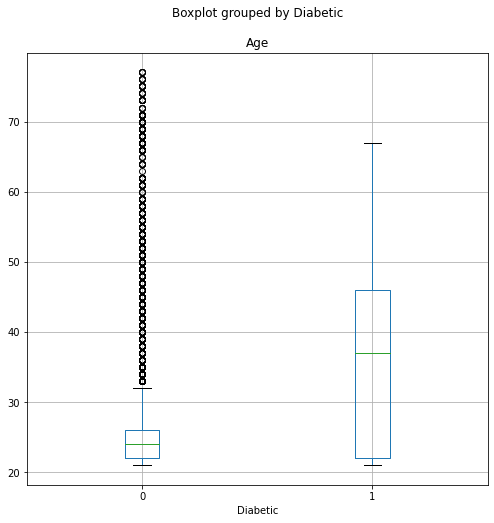

In [5]:
%matplotlib inline
for col in features:
    df.boxplot(column=col, by='Diabetic',figsize=(8,8))
    plt.title(col)
plt.show()

In [7]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,y, test_size=0.3, random_state=1)


In [44]:
from sklearn.dummy import DummyClassifier
bm = DummyClassifier()
bm.fit(X_train,y_train)
bm.score(X_test,y_test)

0.5544444444444444

In [45]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC 
import xgboost
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [47]:
for model in [DummyClassifier,LogisticRegression,DecisionTreeClassifier,KNeighborsClassifier,
              GaussianNB, SVC, RandomForestClassifier, xgboost.XGBClassifier]:
    cls = model()
    kfold = KFold(n_splits=10, random_state=12)
    s = cross_val_score(cls, X_train, y_train, scoring="roc_auc", cv=kfold)
    
    print(f"{model.__name__} AUC: {s.mean():.3f} STD: {s.std():.2f}")

DummyClassifier AUC: 0.510 STD: 0.02
LogisticRegression AUC: 0.845 STD: 0.02
DecisionTreeClassifier AUC: 0.887 STD: 0.01
KNeighborsClassifier AUC: 0.890 STD: 0.01
GaussianNB AUC: 0.853 STD: 0.01
SVC AUC: 0.870 STD: 0.01
RandomForestClassifier AUC: 0.983 STD: 0.00
XGBClassifier AUC: 0.991 STD: 0.00


In [15]:
from sklearn.metrics import classification_report

In [ ]:
for model in [DummyClassifier,LogisticRegression,DecisionTreeClassifier,KNeighborsClassifier,
              GaussianNB, SVC, RandomForestClassifier, xgboost.XGBClassifier]:
    cls = model()
    kfold = KFold(n_splits=10, random_state=12)
    s = cross_val_score(cls, X, y, scoring="roc_auc", cv=kfold)
    
    print(f"{model.__name__} AUC: {s.mean():.3f} STD: {s.std():.2f}")

In [10]:
m = LogisticRegression(C=100, solver="liblinear")
m.fit(X_train,y_train)

LogisticRegression(C=100, solver='liblinear')

In [11]:
prediction = m.predict(X_test)

In [ ]:
prediction, y_test

In [12]:
from sklearn.metrics import accuracy_score

In [13]:
accuracy_score(y_test,prediction)

0.7875555555555556

In [16]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.81      0.89      0.85      3012
           1       0.72      0.59      0.65      1488

    accuracy                           0.79      4500
   macro avg       0.77      0.74      0.75      4500
weighted avg       0.78      0.79      0.78      4500



In [17]:
from sklearn.metrics import confusion_matrix

In [18]:
confusion_matrix(y_test,prediction)

array([[2670,  342],
       [ 614,  874]])

In [26]:
y_score = m.predict_proba(X_test)
y_score[:3]

array([[0.92104787, 0.07895213],
       [0.65055788, 0.34944212],
       [0.86616331, 0.13383669]])

In [27]:
y_score[:,1][:3]

array([0.07895213, 0.34944212, 0.13383669])

In [ ]:
prediction[:3]

In [30]:
a = xgboost.XGBClassifier().fit(X_train,y_train)

In [32]:
pa = a.predict_proba(X_test)

array([[9.9998897e-01, 1.1046695e-05],
       [1.8434942e-02, 9.8156506e-01],
       [1.7345446e-01, 8.2654554e-01],
       ...,
       [1.0672289e-01, 8.9327711e-01],
       [9.9113768e-01, 8.8623371e-03],
       [9.9899983e-01, 1.0001765e-03]], dtype=float32)

In [19]:
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix

In [37]:
fpr, tpr, _ = roc_curve(y_test,pa[:,1])
fpra, tpra, _ = roc_curve(y_test,y_score[:,1])

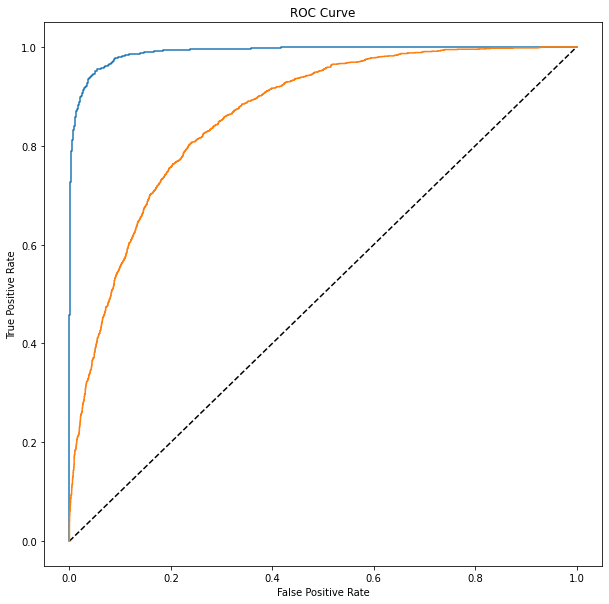

In [38]:
fig = plt.figure(figsize=(10,10))
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr)
plt.plot(fpra,tpra)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [49]:
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test,y_score[:,1])
print(f"AUC: {auc:.2f}")

AUC: 0.86


In [50]:
aucXGB = roc_auc_score(y_test,pa[:,1])
print(f"AUC: {aucXGB:.2f}")

AUC: 0.99


In [52]:
gini=2*auc-1
gini

0.7208317268560169

In [53]:
gini=2*aucXGB-1
gini

0.9807151323023318

In [56]:
from AmaFree import AdvancedScorecardBuilder as asb

In [58]:
features =  ['Pregnancies', 'PlasmaGlucose', 'DiastolicBloodPressure',
       'TricepsThickness', 'SerumInsulin', 'BMI', 'DiabetesPedigree', 'Age','Diabetic']
df = df[features]

In [61]:
df.head()

,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,Age,Diabetic
0,0,171,80,34,23,43.509726,1.213191,21,0
1,8,92,93,47,36,21.240576,0.158365,23,0
2,7,115,47,52,35,41.511523,0.079019,23,0
3,9,103,78,25,304,29.582192,1.282870,43,1
4,1,85,59,27,35,42.604536,0.549542,22,0


In [60]:
a = asb(df,'Diabetic')

In [64]:
print(a.DESCR)

 Advanced ScoreCard Builder Free Version
    Parameters
    ----------
    df: DataFrame, abt dataset. With one target column

    target_name: string, target column name   
        
    dates: string or list, optional (default=None)
     A date type columns list

    Return
    ------
    data: Pandas DataFrame, shape=[n_sample,n_features]  
          data without target
    target_name: string, target column name
    target: 1d NumPy array
       
    _removed_features: dict with removed features from data - one value 
    
    if dates is not None
    _date_names: str, list of date column names
    _date_columns: Numpy array with date type column

    
    Examples
    --------

    >>> import pandas as pd
    >>> from AmaFree import AdvancedScorecardBuilder as asb
    >>> from sklearn import datasets
    >>> X,y = datasets.make_classification(n_samples=10**4, n_features=15, random_state=123)
    >>> names = []
    >>> for el in range(15):
    >>>     names.append("zm"+str(el+1))
  

In [65]:
a.fit()

Pregnancies
PlasmaGlucose
DiastolicBloodPressure
TricepsThickness
SerumInsulin
BMI
DiabetesPedigree
Age


In [67]:
a.get_scorecard()

,label,variable,score
0,(not missing) and Pregnancies <= 1.5,Pregnancies,1
1,5.5 < Pregnancies <= 7.5,Pregnancies,31
2,7.5 < Pregnancies,Pregnancies,64
3,1.5 < Pregnancies <= 5.5,Pregnancies,131
4,168.5 < PlasmaGlucose,PlasmaGlucose,1
5,95.5 < PlasmaGlucose <= 113.5,PlasmaGlucose,5
6,113.5 < PlasmaGlucose <= 168.5,PlasmaGlucose,48
7,(not missing) and PlasmaGlucose <= 95.5,PlasmaGlucose,72
8,77.5 < DiastolicBloodPressure,DiastolicBloodPressure,1
9,68.5 < DiastolicBloodPressure <= 77.5,DiastolicBloodPressure,21


In [69]:
a.gini_model() # gini na regresji logistycznej !!!! z 

0.9716795484221006

In [70]:
gini=2*aucXGB-1
gini

0.9807151323023318

In [73]:
a.model_info_

{'coef': {'Pregnancies': 0.9949424353848697,
  'PlasmaGlucose': 1.0163527686433598,
  'DiastolicBloodPressure': 1.0444324730298216,
  'TricepsThickness': 1.0171383931482374,
  'SerumInsulin': 1.0126967347477631,
  'BMI': 0.969925827183836,
  'DiabetesPedigree': 0.9407639559994201,
  'Age': 1.0289780193192748},
 'p_value': {'Pregnancies': 0.0,
  'PlasmaGlucose': 0.0,
  'DiastolicBloodPressure': 0.0,
  'TricepsThickness': 0.0,
  'SerumInsulin': 0.0,
  'BMI': 0.0,
  'DiabetesPedigree': 0.0,
  'Age': 0.0},
 'features': ['Pregnancies',
  'PlasmaGlucose',
  'DiastolicBloodPressure',
  'TricepsThickness',
  'SerumInsulin',
  'BMI',
  'DiabetesPedigree',
  'Age'],
 'model': 'LogisticRegressionCV',
 'gini': 0.9716795484221006,
 'acc': 0.9377777777777778,
 'Precision': 0.8958594730238394,
 'Recall': 0.9260700389105059,
 'F1': 0.9107142857142857,
 'intercept': array([4.9847764])}

In [74]:
a.html_report()